In [1]:
'''1. Import claims_data.csv and cust_data.csv which is provided to you and
combine the two datasets appropriately to create a 360-degree view of
the data. Use the same for the subsequent questions.'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import seaborn as sns

In [2]:
df_in= pd.read_csv("claims.csv")
df_cust= pd.read_csv("cust_demographics.csv")


In [3]:
df_in.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
df_in.isnull().sum()
#df_in.dropna(inplace=True)

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [5]:
df_in.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [6]:
df_cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [7]:
df_cust.isnull().sum()

CUST_ID        0
gender         0
DateOfBirth    0
State          0
Contact        0
Segment        0
dtype: int64

In [8]:
#Q1.combining two csv file by using join
df=pd.merge(right = df_in , left = df_cust, 
            right_on= 'customer_id', left_on= 'CUST_ID', how = 'inner')

In [9]:
df.drop(columns = 'customer_id', inplace = True)
df.head()


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [10]:
'''q2.. Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.'''
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [11]:
df.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [12]:
df['DateOfBirth']=pd.to_datetime(df['DateOfBirth'])
df['claim_date']=pd.to_datetime(df['claim_date'])
df["Contact"] = pd.to_numeric(df.Contact.str.replace("-",""),downcast='float')

In [13]:
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,2070-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   float32       
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   object        
 13  total_policy_claims  1075 non-nul

In [15]:
'''3. Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.'''
df["claim_amount"]=pd.to_numeric(df.claim_amount.str.replace("$",""),downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   float32       
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float32       
 13  total_policy_claims  1075 non-nul

C:\Users\kchan\AppData\Local\Temp/ipykernel_12108/3181905968.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["claim_amount"]=pd.to_numeric(df.claim_amount.str.replace("$",""),downcast='float')


In [16]:
df.head(100)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,2070-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,55180831,Male,2062-02-21,MT,4.823196e+09,Gold,1633198,Other driver error,2017-09-07,Auto,No,Material and injury,NaN,1.0,No
96,14433043,Female,2071-06-13,UT,3.143417e+09,Gold,15165423,Driver error,2018-06-30,Auto,Yes,Material only,2170.0,5.0,No
97,56590042,Male,2067-01-12,AL,2.546520e+09,Silver,76552623,Other causes,2017-11-06,Auto,No,Injury only,31498.5,4.0,Yes
98,43870673,Male,1985-06-21,KS,4.282385e+09,Gold,64731876,Other causes,2017-05-22,Auto,Unknown,Material only,1700.0,1.0,No


# """4. Of all the injury claims, some of them have gone unreported with thepolice. Create an alert flag (1,0) for all such claims

In [17]:
df["flag"] = np.where(df.police_report == 'No',0,np.where(df.police_report == "Yes",1,np.nan))
df.drop(columns = ["police_report"], inplace = True)

# '''5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer IDshould remain unique.Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column'

In [18]:
df=df.groupby("CUST_ID").first().reset_index(drop = True)
df.head(10)


,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
3,Male,2071-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0
5,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084,Crime,2018-07-14,Auto,Material only,2630.0,1.0,No,0.0
6,Male,1977-08-03,AK,6.133853e+09,Gold,7238381,Other driver error,2018-07-14,Auto,Material only,2920.0,2.0,No,0.0
7,Female,1997-12-07,AL,4.877234e+09,Gold,87184588,Other causes,2017-10-10,Auto,Material and injury,21190.0,1.0,No,0.0
8,Male,2062-02-17,HI,3.215345e+09,Platinum,86240106,Driver error,2017-07-01,Auto,Material only,2490.0,2.0,No,0.0
9,Female,2060-07-29,OR,7.367260e+09,Silver,50906515,Crime,2018-08-23,Auto,Material only,2507.0,5.0,Yes,0.0


# '''6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)'''


In [19]:
df.isnull().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 0
incident_cause           0
claim_date               0
claim_area               0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
flag                   292
dtype: int64

In [20]:
df["total_policy_claims"]=df["total_policy_claims"].fillna(df["total_policy_claims"].mode()[0])
df["claim_amount"] = df["claim_amount"].fillna(df["claim_amount"].mean())
df["flag"]=df["flag"].fillna(df["flag"].mode()[0])
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0
3,Male,2071-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0


In [21]:
df.isnull().sum()

gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag                   0
dtype: int64

In [22]:
'''7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60'''
df.loc[(df.DateOfBirth.dt.year > 2020),"DateOfBirth"]=df[df.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))


In [23]:
df["age"]=round((df.claim_date - df.DateOfBirth).apply(lambda a: a.days)/365.25, 0)
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0,40.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,47.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,38.0


In [24]:
df['Age_group'] = np.where(df.age <18,'Childen',np.where(df.age<30,'Youth',np.where(df.age<60,'Adult','Senior')))

In [25]:
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,Age_group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0,40.0,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,47.0,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,38.0,Adult


# '''8. What is the average amount claimed by the customers from various Segments?'''


In [49]:
df.groupby('Segment')['claim_amount'].mean().reset_index(name="Average")

,Segment,Average
0,Gold,12756.479492
1,Platinum,12369.304688
2,Silver,12269.435547


# '''9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.'''


In [27]:
df.loc[df.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum()

incident_cause
Crime                  724462.5
Driver error          3264286.0
Natural causes        1312706.0
Other causes          3725038.5
Other driver error    3318806.5
Name: claim_amount, dtype: float32

# '''10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?'''

In [28]:
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,Age_group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0,40.0,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,47.0,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,38.0,Adult


In [29]:
df.loc[(df.State.isin(['TX','DE','AK']))&(df.incident_cause.str.lower().str.contains("driver")) & (df.Age_group == 'Adult')].groupby(by = "State")['Age_group'].count().reset_index(name="count")


,State,count
0,AK,8
1,DE,9
2,TX,7


# 11. Draw a pie chart between the aggregated value of claim amount basedon gender and segment. Represent the claim amount as a percentage onthe pie chart.

In [30]:
pie_=df.groupby(by=['gender','Segment'])['claim_amount'].sum().reset_index()

In [51]:
pie_.head()

,gender,Segment,claim_amount
0,Female,Gold,2109763.5
1,Female,Platinum,2369503.5
2,Female,Silver,1898558.5
3,Male,Gold,2622890.5
4,Male,Platinum,2095815.5


In [32]:
pie_chart =pie_.pivot(index = "Segment", columns = "gender", values ="claim_amount")
pie_chart

gender,Female,Male
Segment,,
Gold,2109763.5,2622890.5
Platinum,2369503.5,2095815.5
Silver,1898558.5,2346666.0


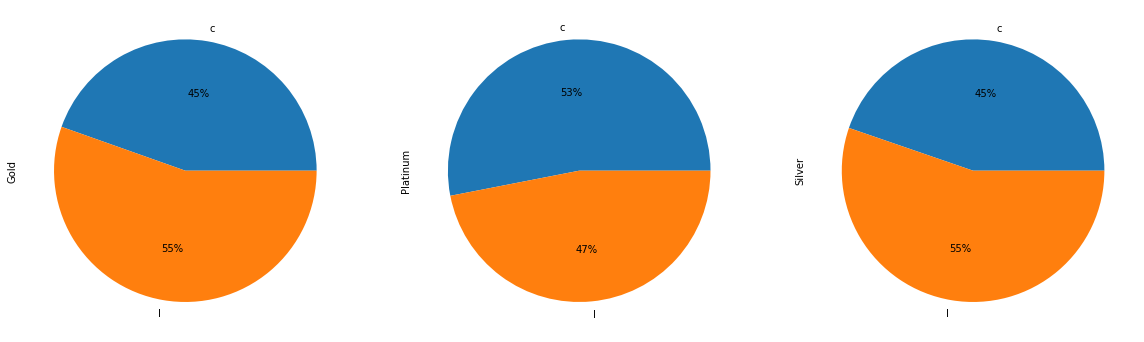

In [57]:
pie_chart.T.plot(kind = "pie",subplots=True,legend = False,figsize=(20,10),labels="claim_amount",autopct='%1.0f%%')
plt.show()

# 12. Among males and females, which gender had claimed the most for  any type of driver related issues? E.g. This metric can be compared using a bar chart

In [34]:
bar_= df.loc[(df.incident_cause.str.lower().str.contains("driver"))].groupby("gender")[["gender"]].count().add_suffix("_count").reset_index()
bar_

,gender,gender_count
0,Female,221
1,Male,280


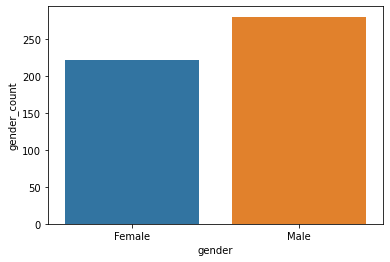

In [59]:
sns.barplot(x = 'gender',
            y = 'gender_count',
            data = bar_)
plt.show()


# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [36]:
bar_fraud = df.groupby("Age_group")[["fraudulent"]].count().reset_index()
bar_fraud

,Age_group,fraudulent
0,Adult,758
1,Childen,2
2,Youth,318


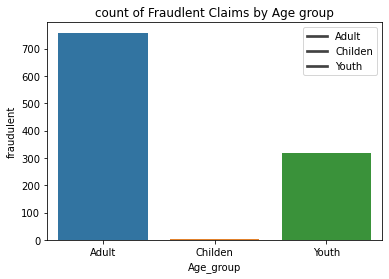

In [37]:
sns.barplot(x='Age_group',y='fraudulent',data=bar_fraud)
plt.legend(['Adult','Childen','Youth'])
plt.title('count of Fraudlent Claims by Age group')
plt.show()

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.


In [38]:
monthly_claims= pd.DataFrame(df.groupby(df['claim_date'].dt.month).claim_amount.sum().reset_index())
monthly_claims.columns = ['Month','claim_amount']
monthly_claims.head()

,Month,claim_amount
0,1,1332012.0
1,2,1133107.0
2,3,1320094.0
3,4,1276071.5
4,5,1114211.5


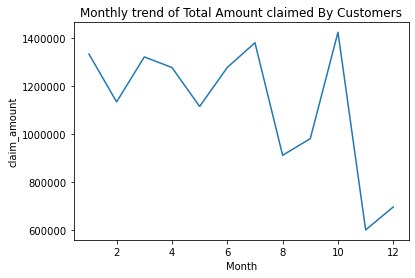

In [61]:
sns.lineplot(x='Month',y='claim_amount',data=monthly_claims)
plt.ticklabel_format(style = 'plain',axis = 'y')
plt.title('Monthly trend of Total Amount claimed By Customers')
plt.show()


# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailedwrite-up on the parameters taken into consideration, the Hypothesistesting steps, conclusion from the p-values and the business implications of the statements.


In [40]:
avg_claim_amt= df.groupby(['gender','Age_group','fraudulent']).claim_amount.mean().reset_index()
avg_claim_amt

,gender,Age_group,fraudulent,claim_amount
0,Female,Adult,No,12409.596680
1,Female,Adult,Yes,12348.010742
2,Female,Childen,No,20200.000000
3,Female,Youth,No,12398.187500
4,Female,Youth,Yes,7756.771484
5,Male,Adult,No,12150.460938
6,Male,Adult,Yes,17062.199219
7,Male,Childen,No,24610.000000
8,Male,Youth,No,12199.076172
9,Male,Youth,Yes,10683.552734


C:\Users\kchan\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


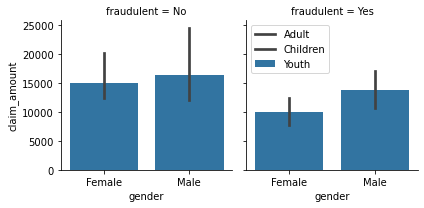

In [63]:
facet= sns.FacetGrid(data =avg_claim_amt, col ='')
facet.map(sns.barplot,'gender', 'claim_amount',hue_order =['Adult','Children','Youth'])
plt.legend(['Adult','Children','Youth'])
plt.ticklabel_format(style = 'plain',axis = 'y')
plt.show()

# 16. Is there any similarity in the amount claimed by males and females?


In [42]:
from scipy import stats

In [43]:
male = df.loc[df.gender == 'Male','claim_amount']
female = df.loc[df.gender == 'Female','claim_amount']

In [44]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=0.8848699385883664, pvalue=0.37642447095092635)

# 17. Is there any relationship between age category and segment?



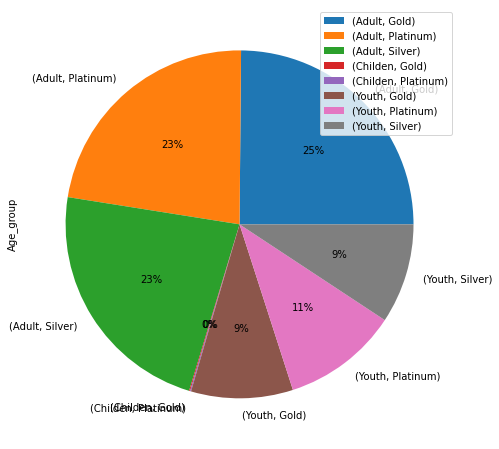

In [45]:
rel=df.groupby(by=["Age_group","Segment"])["Age_group"].count().plot(kind = "pie",legend="Age_group",subplots=True,figsize=(8,8),autopct='%1.0f%%')

In [46]:
crosstab= pd.crosstab(df.Segment,df.Age_group)
crosstab

Age_group,Adult,Childen,Youth
Segment,,,
Gold,268,1,102
Platinum,244,1,116
Silver,246,0,100


In [47]:
stats.chi2_contingencyrelationship between (crosstab)

SyntaxError: invalid syntax (Temp/ipykernel_12108/644133791.py, line 1)

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
print('Max Date:',df.claim_date.max(),'| Min Date:',df.claim_date.min())

In [ ]:
dates = df[(df.claim_date>'2017-01-01') & (df.claim_date<'2018-01-01')]
dates.head()

In [ ]:
print('Current Year Claim Amount Average:', round(dates.mean(),2))

In [ ]:
stats.ttest_1samp(dates.claim_amount,10000)


# 19. Is there any difference between age groups and insurance claims?

In [ ]:
df.head()

In [ ]:
adult_amt = df.loc[df.Age_group == 'Adult','claim_amount']
children_amt = df.loc[df.Age_group == 'Childen','claim_amount']
youth_amt = df.loc[df.Age_group == 'Youth','claim_amount']

In [ ]:
print(' mean of Adult  : ',adult_amt.mean(),'| Mean of Youth: ',youth_amt.mean() ,
      '| Mean of Children : ',children_amt.mean())

In [ ]:
stats.f_oneway(adult_amt,youth_amt,children_amt)

# 20. Is there any relationship between total number of policy claims and the claimed amount?

In [ ]:
stats.pearsonr(df.total_policy_claims, df.claim_amount)

In [ ]:
policy_age_group=df.groupby("Age_group").total_policy_claims.sum().reset_index(name="no of policies")
policy_age_group

In [ ]:
stats.ttest_ind(male,female)


In [ ]:
policy_age_group.plot(kind = "pie",legend = False,y="no of policies",labels=['Adult','Children','Youth'],figsize=(10,10),autopct='%1.0f%%')
plt.show()

In [ ]:
df.head()

In [ ]:
gender_mean=df.groupby("gender")['claim_amount'].mean().reset_index(name="Average")
gender_mean

In [ ]:
sns.barplot(x='gender',y='Average',data=gender_mean)